In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

# Load the California Housing Price Dataset

In [2]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [3]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
# Check the description of the dataset
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [6]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


# Prepare Dataset

In [7]:
# Add all the feature columns with their corresponding names
df = pd.DataFrame(california.data, columns=california.feature_names)

# Add the target column
df['Price'] = california.target

In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
# Summarize stats of dataset
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [11]:
# Check missing values
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


# Exploratory Data Analysis

In [12]:
# Correlation
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Text(0, 0.5, 'Price')

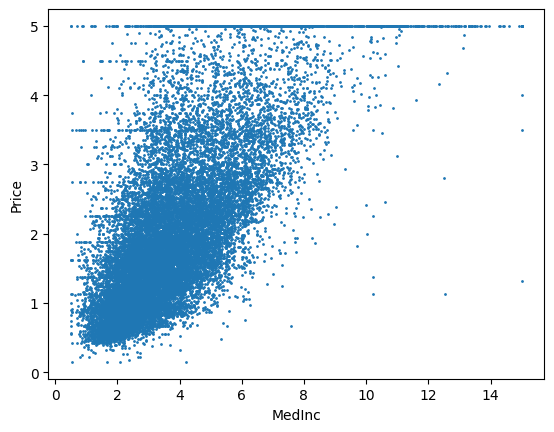

In [13]:
plt.scatter(df['MedInc'], df['Price'], 1)
plt.xlabel('MedInc')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

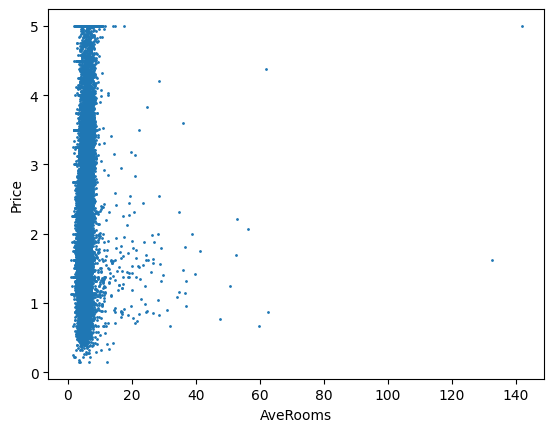

In [14]:
plt.scatter(df['AveRooms'], df['Price'], 1)
plt.xlabel('AveRooms')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

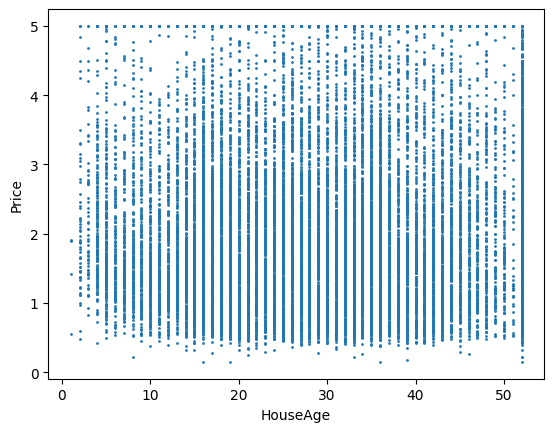

In [15]:
plt.scatter(df['HouseAge'], df['Price'], 1)
plt.xlabel('HouseAge')
plt.ylabel('Price')

<Axes: xlabel='MedInc', ylabel='Price'>

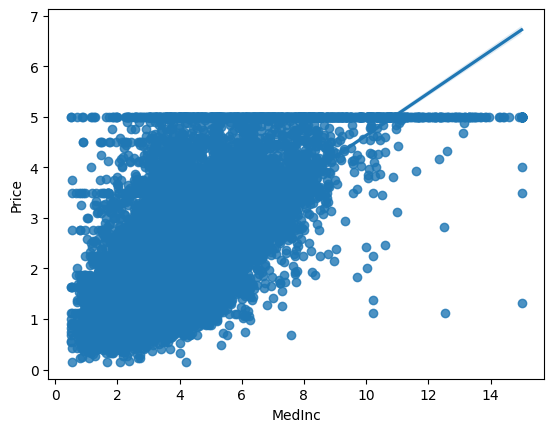

In [16]:
import seaborn as sns
sns.regplot(x='MedInc', y='Price', data=df)

<Axes: xlabel='AveRooms', ylabel='Price'>

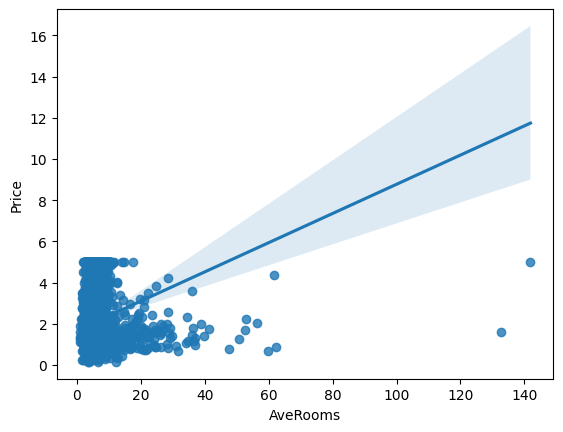

In [17]:
sns.regplot(x='AveRooms', y='Price', data=df)

<Axes: xlabel='HouseAge', ylabel='Price'>

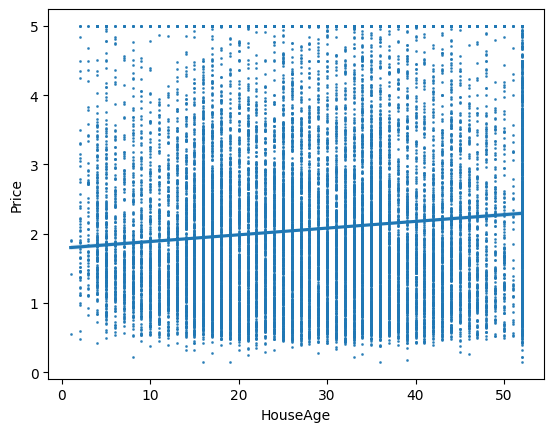

In [18]:
sns.regplot(x='HouseAge', y='Price', data=df, scatter_kws={'s': 1})

<Axes: xlabel='Latitude', ylabel='Price'>

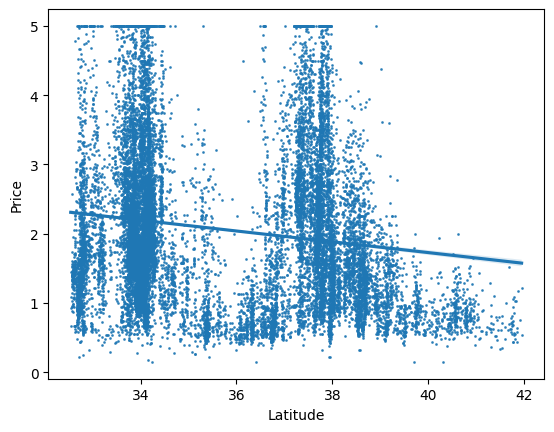

In [19]:
sns.regplot(x='Latitude', y='Price', data=df, scatter_kws={'s':1})


# Additional EDA: Distributions and Geography

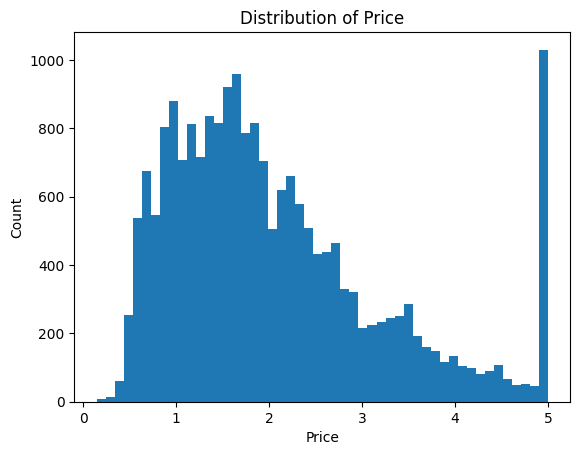

In [20]:
# Target distribution
plt.figure()
plt.hist(df['Price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Price')
plt.show()

There is a clear cap at 5.0

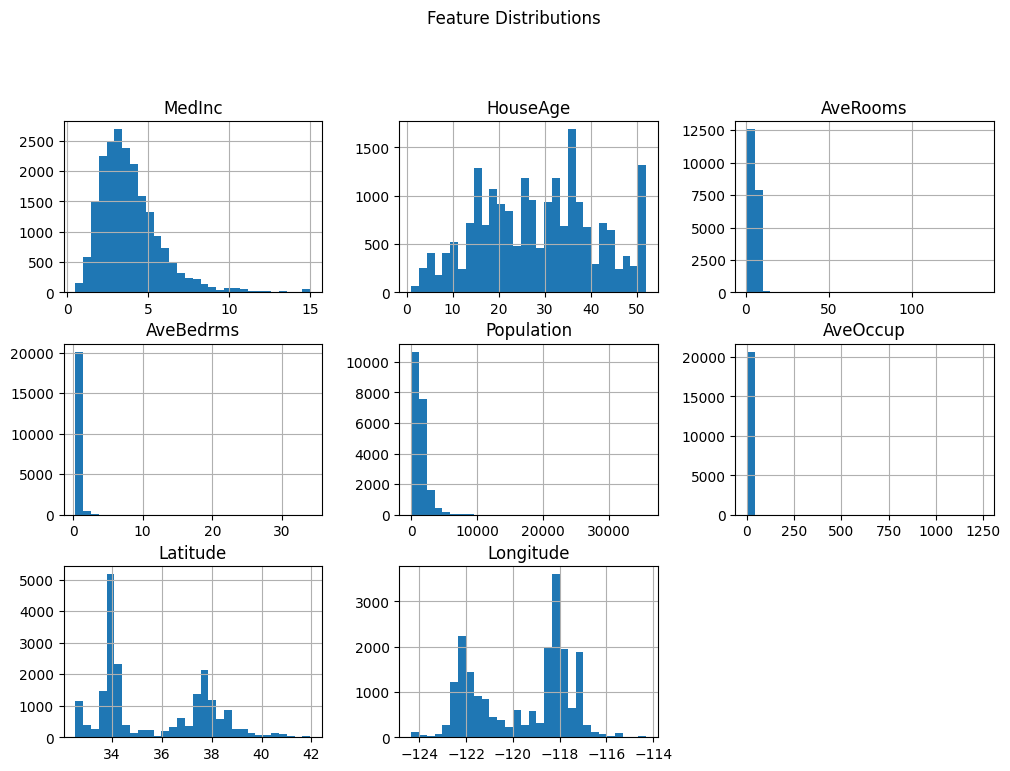

In [21]:
# Quick feature distributions
df.drop(columns=['Price']).hist(bins=30, figsize=(12,8))
plt.suptitle('Feature Distributions', y=1.02)
plt.show()

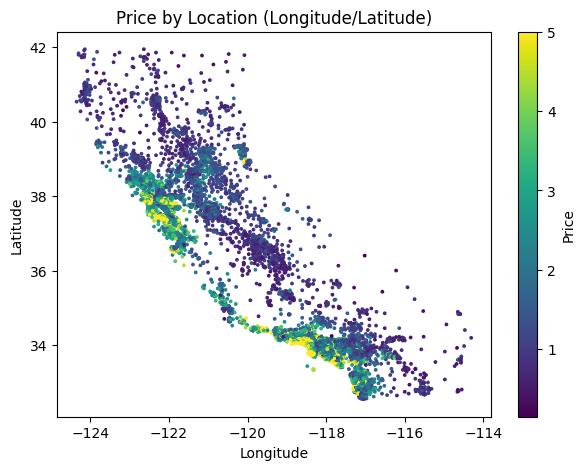

In [22]:
# Geography matters a lot in California Housing
plt.figure(figsize=(7,5))
sc = plt.scatter(df['Longitude'], df['Latitude'], c=df['Price'], s=3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Price by Location (Longitude/Latitude)')
plt.colorbar(sc, label='Price')
plt.show()

# Feature Set

In [23]:
# Independent and Dependent Features
X = df.iloc[:, :-1].drop('AveBedrms', axis=1) # AveBedrms has high correlation with AveRooms so we remove due to multicollinearity
y = df.iloc[:, -1]

X.head(), y.head()

(   MedInc  HouseAge  AveRooms  Population  AveOccup  Latitude  Longitude
 0  8.3252      41.0  6.984127       322.0  2.555556     37.88    -122.23
 1  8.3014      21.0  6.238137      2401.0  2.109842     37.86    -122.22
 2  7.2574      52.0  8.288136       496.0  2.802260     37.85    -122.24
 3  5.6431      52.0  5.817352       558.0  2.547945     37.85    -122.25
 4  3.8462      52.0  6.281853       565.0  2.181467     37.85    -122.25,
 0    4.526
 1    3.585
 2    3.521
 3    3.413
 4    3.422
 Name: Price, dtype: float64)

# Modeling and Evaluation

In [24]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

np.random.seed(42)

In [25]:
def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mse,
        "RMSE": np.sqrt(mse),
        "R2": r2_score(y_true, y_pred),
    }

def fit_eval(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return evaluate_regression(y_test, pred), pred

## A) Full Dataset (Includes capped target) OLS

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

baseline = DummyRegressor(strategy="mean")
ols_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

baseline_metrics, baseline_pred = fit_eval(baseline, X_train, X_test, y_train, y_test)
ols_metrics, ols_pred = fit_eval(ols_pipe, X_train, X_test, y_train, y_test)

pd.DataFrame([baseline_metrics, ols_metrics], index=["Baseline(mean)", "OLS + StandardScaler"])

,MAE,MSE,RMSE,R2
Baseline(mean),0.906069,1.310696,1.144856,-0.000219
OLS + StandardScaler,0.542544,0.547326,0.739815,0.582324


In [27]:
# Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = -cross_val_score(ols_pipe, X, y, scoring="neg_root_mean_squared_error", cv=cv)
r2_scores = cross_val_score(ols_pipe, X, y, scoring="r2", cv=cv)

print(f"CV RMSE: {rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}")
print(f"CV R2  : {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")

CV RMSE: 0.7368 ± 0.0083
CV R2  : 0.5922 ± 0.0092


### Diagnostics (Full Dataset)

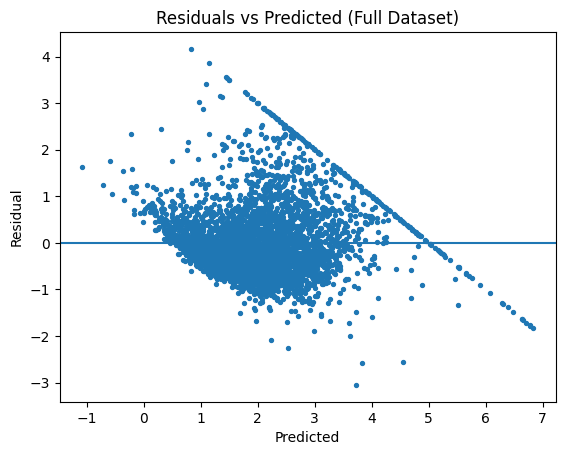

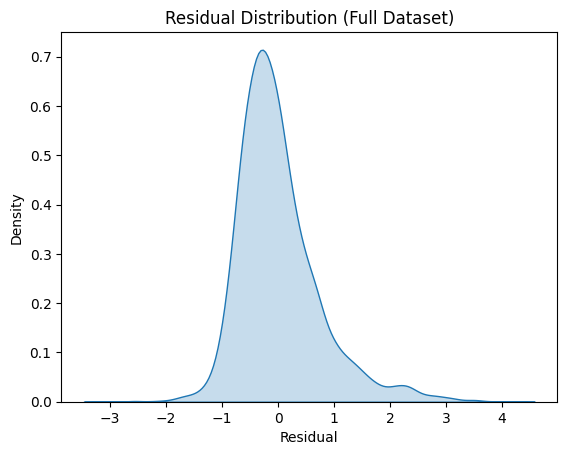

In [28]:
residuals = y_test - ols_pred

plt.figure()
plt.scatter(ols_pred, residuals, s=8)
plt.axhline(0)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted (Full Dataset)")
plt.show()

plt.figure()
sns.kdeplot(residuals, fill=True)
plt.xlabel("Residual")
plt.title("Residual Distribution (Full Dataset)")
plt.show()

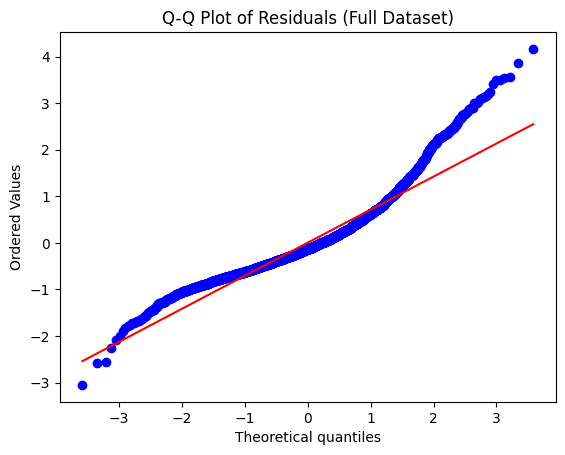

In [29]:
# Q-Q plot: checks whether residuals are approximately normal
import scipy.stats as stats

plt.figure()
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals (Full Dataset)")
plt.show()

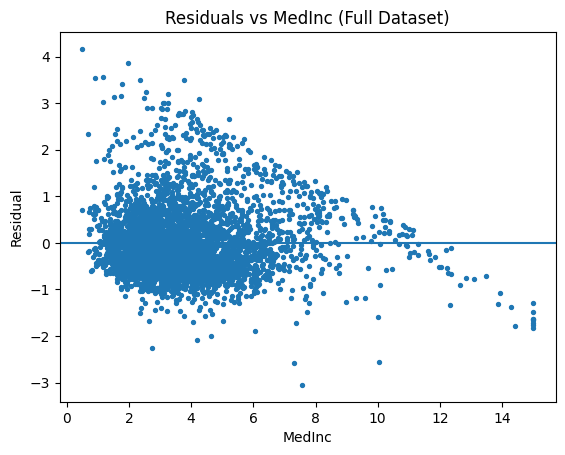

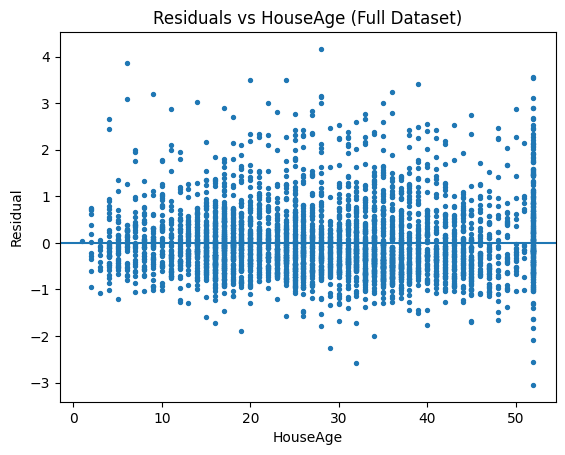

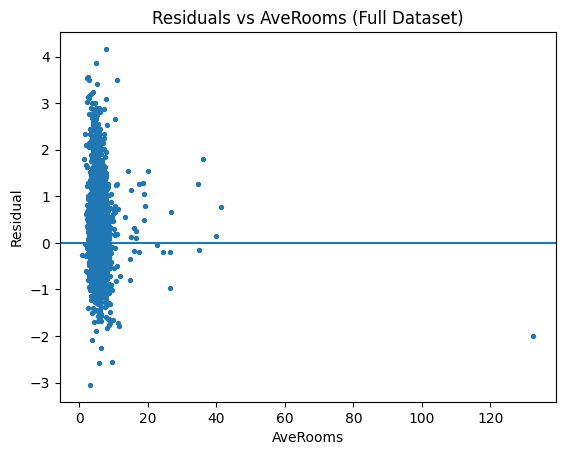

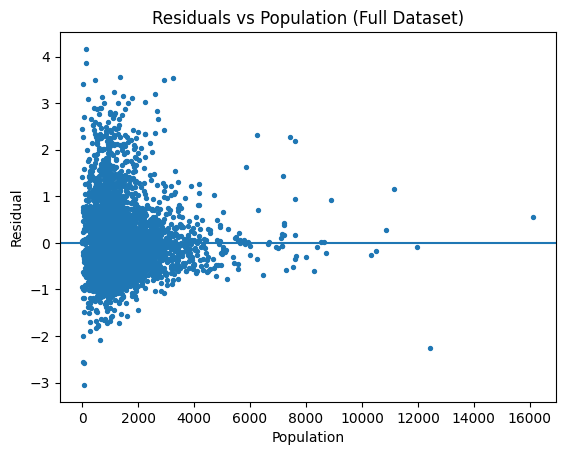

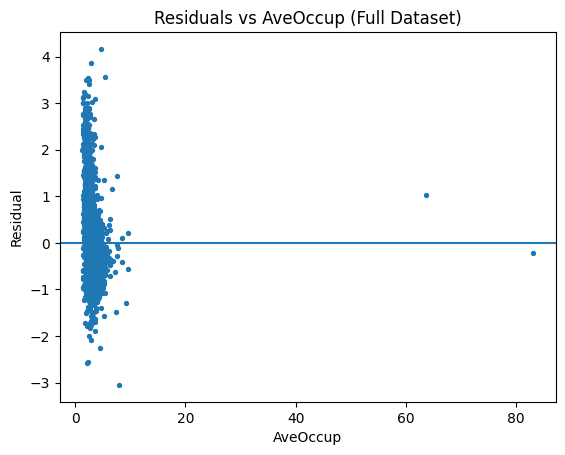

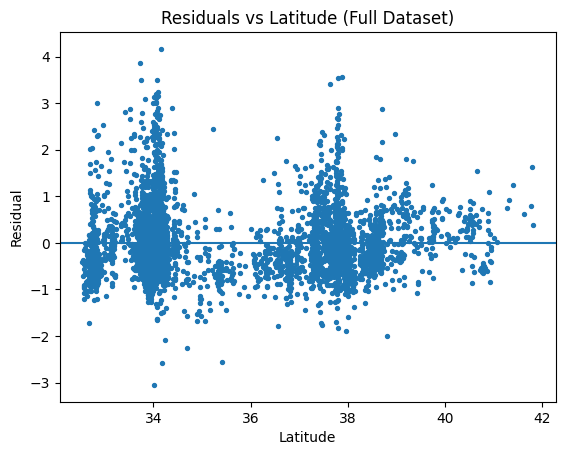

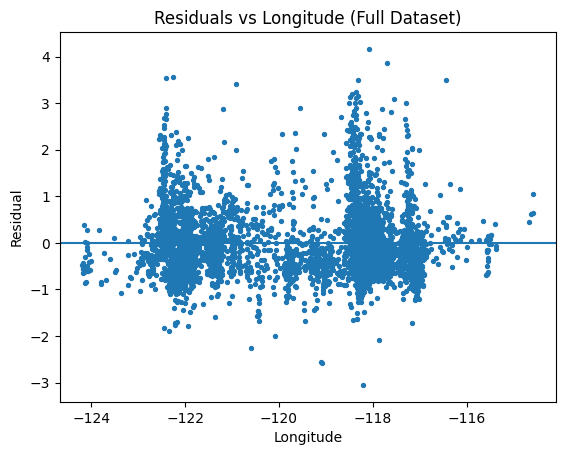

In [30]:
# Residuals vs key features (helps spot nonlinearity / missing terms)
key_features = ["MedInc", "HouseAge", "AveRooms", "Population", "AveOccup", "Latitude", "Longitude"]
# key_features exist because we dropped only AveBedrms
X_test_df = X_test.copy()

for feat in key_features:
    plt.figure()
    plt.scatter(X_test_df[feat], residuals, s=8)
    plt.axhline(0)
    plt.xlabel(feat)
    plt.ylabel("Residual")
    plt.title(f"Residuals vs {feat} (Full Dataset)")
    plt.show()

### Multicollinearity check (VIF)

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF is computed on the *raw* (unscaled) features
X_vif = X_train.copy()
vif = pd.DataFrame({
    "feature": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
}).sort_values("VIF", ascending=False)

vif

,feature,VIF
6,Longitude,577.069123
5,Latitude,533.185747
2,AveRooms,7.341012
1,HouseAge,7.146601
0,MedInc,6.063672
3,Population,2.915714
4,AveOccup,1.080117


## B) Uncapped Dataset (Remove top capped rows) OLS

In [32]:
cap = 5.0
mask = y < cap  # removes rows where the target is clipped at the cap

X_uncap = X.loc[mask].copy()
y_uncap = y.loc[mask].copy()

print("Original rows:", len(y))
print("Uncapped rows :", len(y_uncap))
print("Dropped capped:", len(y) - len(y_uncap))

Original rows: 20640
Uncapped rows : 19648
Dropped capped: 992


In [33]:
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_uncap, y_uncap, test_size=0.2, random_state=42)

baseline_metrics_u, baseline_pred_u = fit_eval(baseline, X_train_u, X_test_u, y_train_u, y_test_u)
ols_metrics_u, ols_pred_u = fit_eval(ols_pipe, X_train_u, X_test_u, y_train_u, y_test_u)

pd.DataFrame([baseline_metrics_u, ols_metrics_u], index=["Baseline(mean)", "OLS + StandardScaler (uncapped)"])

,MAE,MSE,RMSE,R2
Baseline(mean),0.786308,0.958728,0.979146,-1.139293e-08
OLS + StandardScaler (uncapped),0.493214,0.427981,0.654202,5.535949e-01


In [34]:
# CV
rmse_scores_u = -cross_val_score(
    ols_pipe, X_uncap, y_uncap, scoring="neg_root_mean_squared_error", cv=cv
)
r2_scores_u = cross_val_score(
    ols_pipe, X_uncap, y_uncap, scoring="r2", cv=cv
)

print(f"CV RMSE (uncapped): {rmse_scores_u.mean():.4f} ± {rmse_scores_u.std():.4f}")
print(f"CV R2   (uncapped): {r2_scores_u.mean():.4f} ± {r2_scores_u.std():.4f}")

CV RMSE (uncapped): 0.6439 ± 0.0110
CV R2   (uncapped): 0.5602 ± 0.0113


### Diagnostics (Uncapped)

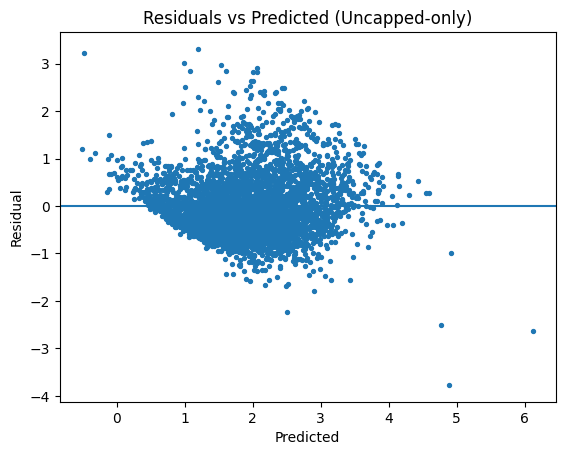

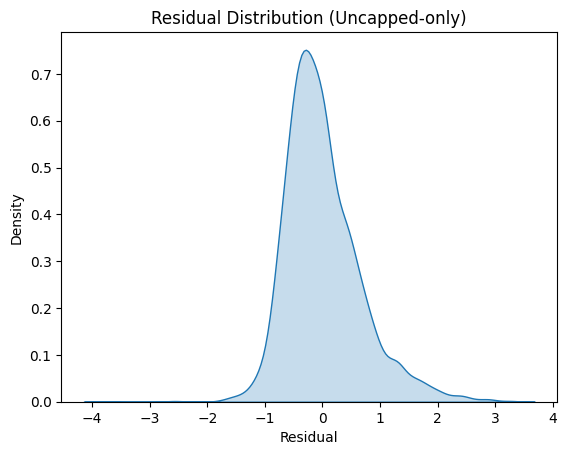

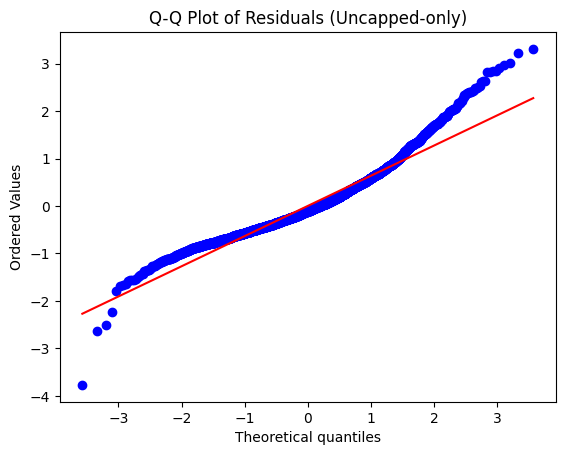

In [35]:
residuals_u = y_test_u - ols_pred_u

plt.figure()
plt.scatter(ols_pred_u, residuals_u, s=8)
plt.axhline(0)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted (Uncapped-only)")
plt.show()

plt.figure()
sns.kdeplot(residuals_u, fill=True)
plt.xlabel("Residual")
plt.title("Residual Distribution (Uncapped-only)")
plt.show()

plt.figure()
stats.probplot(residuals_u, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals (Uncapped-only)")
plt.show()

## C) Ridge Regression (Uncapped Dataset)

In [36]:
alphas = np.logspace(-3, 3, 25)

ridge_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RidgeCV(alphas=alphas, cv=cv))
])

ridge_metrics_u, ridge_pred_u = fit_eval(ridge_pipe, X_train_u, X_test_u, y_train_u, y_test_u)

print("Chosen alpha (ridge):", ridge_pipe.named_steps["model"].alpha_)
pd.DataFrame([ols_metrics_u, ridge_metrics_u], index=["OLS (uncapped)", "RidgeCV (uncapped)"])

Chosen alpha (ridge): 3.1622776601683795


,MAE,MSE,RMSE,R2
OLS (uncapped),0.493214,0.427981,0.654202,0.553595
RidgeCV (uncapped),0.493204,0.427991,0.654210,0.553584


In [37]:
# CV comparison on uncapped data
rmse_ridge_u = -cross_val_score(
    ridge_pipe, X_uncap, y_uncap, scoring="neg_root_mean_squared_error", cv=cv
)
r2_ridge_u = cross_val_score(
    ridge_pipe, X_uncap, y_uncap, scoring="r2", cv=cv
)

print(f"CV RMSE Ridge (uncapped): {rmse_ridge_u.mean():.4f} ± {rmse_ridge_u.std():.4f}")
print(f"CV R2   Ridge (uncapped): {r2_ridge_u.mean():.4f} ± {r2_ridge_u.std():.4f}")

CV RMSE Ridge (uncapped): 0.6485 ± 0.0132
CV R2   Ridge (uncapped): 0.5540 ± 0.0087


## D) XGBoost Regresion (Uncapped Dataset)

In [38]:
import xgboost as xgb

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X_train_u, y_train_u, test_size=0.2, random_state=42)

In [40]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_val, label=y_val)
dtest  = xgb.DMatrix(X_test_u, label=y_test_u)

In [41]:
xgb_params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "learning_rate": 0.05,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "lambda": 1.0,
    "seed": 42,
}

In [42]:
evals_result = {}

xgb_booster = xgb.train(
    params=xgb_params,
    dtrain=dtrain,
    num_boost_round=5000,
    evals=[(dvalid, "valid")],
    early_stopping_rounds=50,
    evals_result=evals_result,
    verbose_eval=100
)
print("Best boosting round:", xgb_booster.best_iteration)

[0]	valid-rmse:0.93161
[100]	valid-rmse:0.45353
[200]	valid-rmse:0.43334
[300]	valid-rmse:0.42490
[400]	valid-rmse:0.42184
[500]	valid-rmse:0.41928
[600]	valid-rmse:0.41727
[700]	valid-rmse:0.41622
[800]	valid-rmse:0.41537
[900]	valid-rmse:0.41481
[951]	valid-rmse:0.41487
Best boosting round: 901


In [43]:
xgb_pred_u = xgb_booster.predict(
    dtest, iteration_range=(0, xgb_booster.best_iteration + 1)
)
xgb_metrics_u = evaluate_regression(y_test_u, xgb_pred_u)

pd.DataFrame(
    [ols_metrics, ols_metrics_u, ridge_metrics_u, xgb_metrics_u],
    index=["OLS", "OLS (uncapped)", "RidgeCV (uncapped)", "XGBoost (uncapped)"]
)

,MAE,MSE,RMSE,R2
OLS,0.542544,0.547326,0.739815,0.582324
OLS (uncapped),0.493214,0.427981,0.654202,0.553595
RidgeCV (uncapped),0.493204,0.427991,0.654210,0.553584
XGBoost (uncapped),0.278377,0.174596,0.417846,0.817888


In [44]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_list, r2_list = [], []

"""
In K-fold cross-validation, early stopping requires an evaluation set within each fold. Therefore,
we train the model fold-by-fold and use the fold’s held-out split as the validation set for early stopping
"""
for fold, (train_idx, val_idx) in enumerate(kf.split(X_uncap), start=1):
    X_tr_f = X_uncap.iloc[train_idx] if hasattr(X_uncap, "iloc") else X_uncap[train_idx]
    y_tr_f = y_uncap.iloc[train_idx] if hasattr(y_uncap, "iloc") else y_uncap[train_idx]
    X_val_f = X_uncap.iloc[val_idx] if hasattr(X_uncap, "iloc") else X_uncap[val_idx]
    y_val_f = y_uncap.iloc[val_idx] if hasattr(y_uncap, "iloc") else y_uncap[val_idx]

    dtr_f = xgb.DMatrix(X_tr_f, label=y_tr_f)
    dva_f = xgb.DMatrix(X_val_f, label=y_val_f)

    booster_f = xgb.train(
        params=xgb_params,
        dtrain=dtr_f,
        num_boost_round=3000,
        evals=[(dva_f, "valid")],
        early_stopping_rounds=50,
        verbose_eval=False
    )

    pred_f = booster_f.predict(dva_f, iteration_range=(0, booster_f.best_iteration + 1))
    m_f = evaluate_regression(y_val_f, pred_f)

    rmse_list.append(m_f["RMSE"])
    r2_list.append(m_f["R2"])

print(f"CV RMSE XGBoost (uncapped): {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
print(f"CV R2   XGBoost (uncapped): {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")

CV RMSE XGBoost (uncapped): 0.3979 ± 0.0106
CV R2   XGBoost (uncapped): 0.8320 ± 0.0070


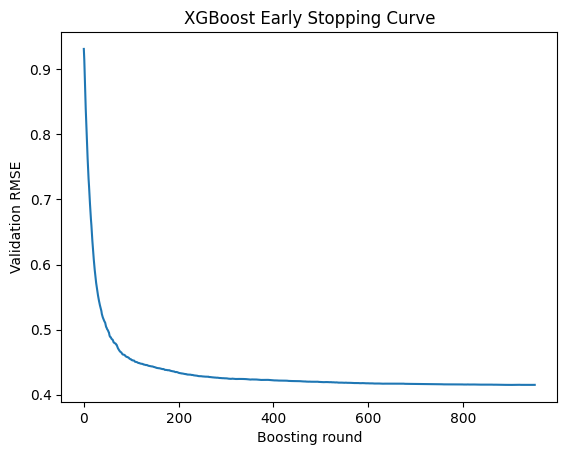

In [45]:
rmse_vals = evals_result["valid"]["rmse"]

plt.plot(rmse_vals)
plt.xlabel("Boosting round")
plt.ylabel("Validation RMSE")
plt.title("XGBoost Early Stopping Curve")
plt.show()

# Deployment

In [46]:
import pickle

In [47]:
pickle.dump(xgb_booster, open("xgb_booster.pkl", "wb"))
pipeline = pickle.load(open("xgb_booster.pkl", "rb"))